# Data Loading

In [1]:
# importing libraries
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import regex as re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as goa
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# loading dataset
df = pd.read_csv("twitter_training.csv")

In [3]:
# Label the columns and drop column "place"
df.columns = ["tweet_id","place", "sentiments", "tweets"]
df = df.drop("place", axis=1)
df

,tweet_id,sentiments,tweets
0,2401,Positive,I am coming to the borders and I will kill you...
1,2401,Positive,im getting on borderlands and i will kill you ...
2,2401,Positive,im coming on borderlands and i will murder you...
3,2401,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Positive,im getting into borderlands and i can murder y...
...,...,...,...
74676,9200,Positive,Just realized that the Windows partition of my...
74677,9200,Positive,Just realized that my Mac window partition is ...
74678,9200,Positive,Just realized the windows partition of my Mac ...
74679,9200,Positive,Just realized between the windows partition of...


# Data Cleaning and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    74681 non-null  int64 
 1   sentiments  74681 non-null  object
 2   tweets      73995 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
# Identify inconsistencies
#The code `duplicate_rows = df[df.duplicated()]` is identifying and storing the duplicate rows in the DataFrame `df`. The `df.duplicated()` function returns a boolean Series indicating whether each row is a duplicate or not. By passing this boolean Series as a filter to the DataFrame `df`, only the duplicate rows are selected and stored in the variable `duplicate_rows`.
duplicate_rows = df[df.duplicated()]
duplicate_rows

,tweet_id,sentiments,tweets
19,2404,Positive,that was the first borderlands session in a lo...
25,2405,Negative,The biggest disappointment of my life came a y...
50,2409,Neutral,Blaming Sight for Tardiness! A little bit of b...
63,2411,Neutral,.. [
145,2425,Negative,"""What a bitch!"""
...,...,...,...
74504,9171,Neutral,This benchmarking comparison between Oculus Qu...
74509,9172,Positive,@ NVIDIAGeForce @ nvidia
74588,9185,Neutral,Heard people are having issues with ordering t...
74618,9190,Positive,This news about the Nvidia 3000 series is ligi...


In [6]:
# Identify missing values
#The code is calculating the number of missing values in each column of the DataFrame `df`. It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = df.isna().sum()
missing_values

tweet_id        0
sentiments      0
tweets        686
dtype: int64

In [7]:
# removing duplicates

df.drop_duplicates(inplace = True)

# Remove the duplicate rows
df = df.drop_duplicates()

# convert tweets to type str

df['tweets'] = df['tweets'].astype(str)


# loading stopwords
stopw = set(stopwords.words("english"))

print(stopw)

# word tokens in lower case
df["tweets"] = df['tweets'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))

# convert list to string
def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st

# filter tokens by keeping only letters and numbers
tokenizer = RegexpTokenizer(r'\w+|\d+')
df["tweets_new"] = df["tweets"].apply(tokenizer.tokenize)
df["tweets_new"] = df["tweets_new"].apply(convert_list_to_str)


df

{'being', 'a', 'having', 'because', 'who', 'why', "shan't", "weren't", "should've", "haven't", 'yourselves', 'doesn', 'here', 'between', 'yourself', 'himself', 'her', 'our', 'over', 'very', 'once', 'each', 'does', 'he', 'which', 'some', 'just', 'when', 'them', 'on', 'can', 'as', 'ain', 'again', 'ourselves', 'how', 'at', 'their', 'yours', 's', 'should', 'hers', 'it', 'that', 'theirs', 'me', 'there', 'are', 'those', 'few', 'off', 'same', 'doing', 'was', 'own', 'they', "isn't", 'out', "she's", 'not', "doesn't", "mustn't", "wasn't", "you'd", 'your', 'had', 'mustn', 'been', 'whom', "that'll", 'm', 'haven', 'below', 'no', 'hadn', 'did', 'his', 'didn', 'themselves', 'but', 'in', 'with', 'further', 'where', "you've", 'through', 'during', 'into', 'after', 'all', 'now', 'am', 'up', 't', 'then', 'needn', 'of', 'before', 'more', "you're", 'don', 'for', 'this', 'i', 'couldn', "hasn't", 'she', 'an', 'were', 'from', 'is', 'has', 'll', 'until', 'be', 'do', 'about', "shouldn't", 'wasn', 'd', 'itself', 

,tweet_id,sentiments,tweets,tweets_new
0,2401,Positive,"coming borders kill all,",coming borders kill all
1,2401,Positive,"im getting borderlands kill all,",im getting borderlands kill all
2,2401,Positive,"im coming borderlands murder all,",im coming borderlands murder all
3,2401,Positive,"im getting borderlands 2 murder all,",im getting borderlands 2 murder all
4,2401,Positive,"im getting borderlands murder all,",im getting borderlands murder all
...,...,...,...,...
74676,9200,Positive,realized windows partition mac like 6 years be...,realized windows partition mac like 6 years be...
74677,9200,Positive,realized mac window partition 6 years behind n...,realized mac window partition 6 years behind n...
74678,9200,Positive,realized windows partition mac 6 years behind ...,realized windows partition mac 6 years behind ...
74679,9200,Positive,realized windows partition mac like 6 years be...,realized windows partition mac like 6 years be...


In [8]:
# Lemmetization
lemmatizer = WordNetLemmatizer()

# parts of speech from wordnet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no mapping found


def lemmatize_sentence(sentence):
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(
        word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    return ' '.join(lemmatized_words)


def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df["tweets_new"] = df["tweets_new"].apply(lemmatize_sentence)
print(df)

# copying columns 
df["tweets"] = df["tweets_new"]

df = df.drop(columns=["tweets_new"])

#fill 0 in mum
df['tweets'] = df['tweets'].fillna(0)

# Save the dataframe
df.to_csv("tweet_clean.csv", index=False)
df


       tweet_id sentiments                                             tweets  \
0          2401   Positive                           coming borders kill all,   
1          2401   Positive                   im getting borderlands kill all,   
2          2401   Positive                  im coming borderlands murder all,   
3          2401   Positive               im getting borderlands 2 murder all,   
4          2401   Positive                 im getting borderlands murder all,   
...         ...        ...                                                ...   
74676      9200   Positive  realized windows partition mac like 6 years be...   
74677      9200   Positive  realized mac window partition 6 years behind n...   
74678      9200   Positive  realized windows partition mac 6 years behind ...   
74679      9200   Positive  realized windows partition mac like 6 years be...   
74680      9200   Positive  like windows partition mac like 6 years behind...   

                           

,tweet_id,sentiments,tweets
0,2401,Positive,come border kill all
1,2401,Positive,im get borderland kill all
2,2401,Positive,im come borderland murder all
3,2401,Positive,im get borderland 2 murder all
4,2401,Positive,im get borderland murder all
...,...,...,...
74676,9200,Positive,realize window partition mac like 6 year behin...
74677,9200,Positive,realize mac window partition 6 year behind nvi...
74678,9200,Positive,realize window partition mac 6 year behind nvi...
74679,9200,Positive,realize window partition mac like 6 year behin...


In [10]:
#check null
df['tweets'].isnull().sum()

0

# Exploratory data analysis (EDA)

In [11]:
#`df.describe().T` is transposing the output of the `describe()` method on a DataFrame `df`. The `describe()` method provides summary statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles. By applying `.T` after `describe()`, the output is transposed, meaning the rows become columns and vice versa. This can be useful for better readability or for further analysis of the summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,71981.0,6437.452383,3743.194317,1.0,3199.0,6434.0,9607.0,13200.0


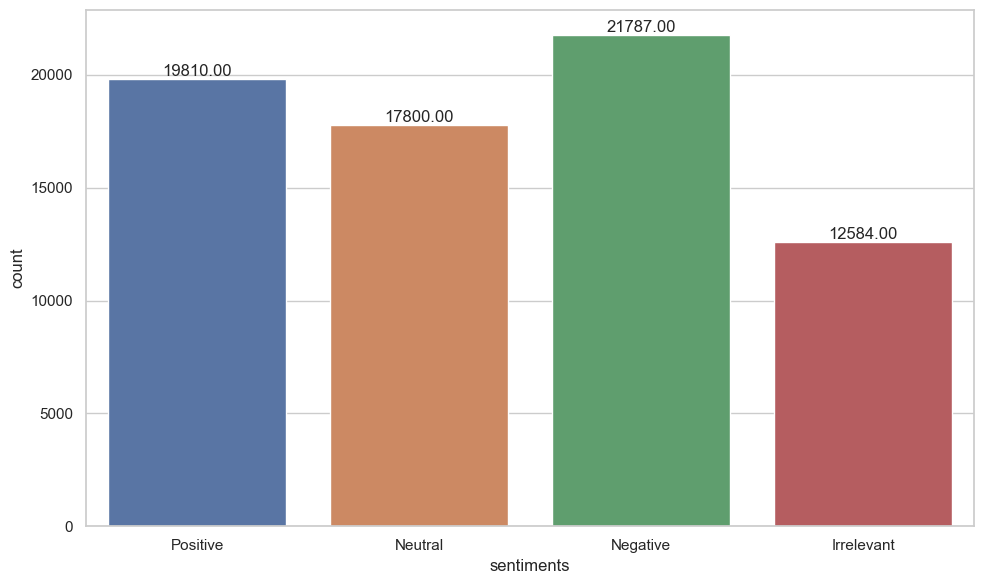

In [12]:
# Plot countplots for categories of tweets with their numbers
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiments', data=df)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()


In [13]:
# Ordinal encode sentiments

df_copy = df.copy()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['sentiments']
df_copy[object_cols] = df_copy[object_cols].astype(str)

df_copy[object_cols] = ordinal_encoder.fit_transform(df_copy[object_cols])

df_copy.head()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['tweet_id', 'sentiments', 'tweets']
df[object_cols] = df[object_cols].astype(str)

df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

df.head()


,tweet_id,sentiments,tweets
0,4254.0,3.0,10535.0
1,4254.0,3.0,28069.0
2,4254.0,3.0,28038.0
3,4254.0,3.0,28068.0
4,4254.0,3.0,28070.0


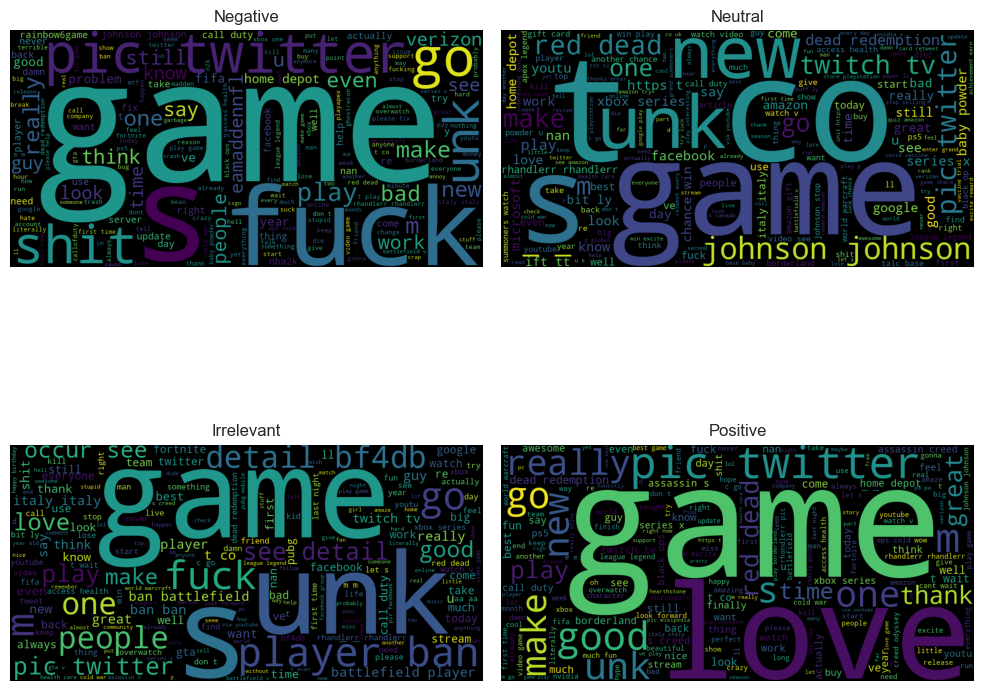

In [16]:
# Extract the sentiment words

negative_words = clean_df[clean_df['sentiments'] == 'Negative']['tweets'].tolist()
neutral_words = clean_df[clean_df['sentiments'] == 'Neutral']['tweets'].tolist()
irrelevant_words = clean_df[clean_df['sentiments'] == 'Irrelevant']['tweets'].tolist()

negative_words = [str(word) for word in negative_words]
neutral_words = [str(word) for word in neutral_words]
irrelevant_words = [str(word) for word in irrelevant_words]


negative_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(negative_words))
neutral_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(neutral_words))
irrelevant_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(irrelevant_words))

# Display the word clouds
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.title('Negative')

plt.subplot(2, 2, 2)
plt.imshow(neutral_wordcloud)
plt.axis('off')
plt.title('Neutral')

plt.subplot(2, 2, 3)
plt.imshow(irrelevant_wordcloud)
plt.axis('off')
plt.title('Irrelevant')

plt.subplot(2, 2, 4)
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title('Positive')

plt.tight_layout()
plt.show()


In [18]:
# print unique sentiments count
print(df['sentiments'].nunique())

4


# CNN Implementation

In [22]:
!pip install transformers

In [23]:
!pip install tensorflow

In [38]:
# Import necessary libraries and modules
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Dense,
    GlobalMaxPooling1D,
    Embedding,
)
from tensorflow.keras.models import Model
import pandas as pd

# Split the dataset into training and testing sets
df_train, df_test, y_train, y_test = train_test_split(
    df_copy["tweets"], df_copy["sentiments"], test_size=0.3
)

# Tokenization of training data
max_words = 10000
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train = tokenizer.texts_to_sequences(df_train)
sequence_test = tokenizer.texts_to_sequences(df_test)
word2vec = tokenizer.word_index
V = len(word2vec)
print("dataset has %s number of independent tokens" % V)

# Padding sequences to ensure uniform length
data_train = pad_sequences(sequence_train)
T = data_train.shape[1]
data_test = pad_sequences(sequence_test, maxlen=T)

# Define the parameters for the CNN model
D = 20  # Embedding dimension

# Define the architecture of the CNN model
i = Input((T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation="relu")(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation="relu")(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation="relu")(x)
x = GlobalMaxPooling1D()(x)
x = Dense(256, activation="relu")(x)
x = Dense(4, activation="softmax")(x)
model = Model(i, x)
model.summary()

# Compile the CNN model
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

# Train the CNN model
cnn_senti = model.fit(
    data_train, y_train, validation_data=(data_test, y_test), epochs=50, batch_size=100
)

# Get the history dictionary
history_dict = cnn_senti.history

# Print the accuracy from the last epoch of CNN model
print("CNN Accuracy: ", history_dict["accuracy"][-1])




dataset has 25151 number of independent tokens
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 163)]             0         
                                                                 
 embedding_12 (Embedding)    (None, 163, 20)           503040    
                                                                 
 conv1d_3 (Conv1D)           (None, 161, 32)           1952      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 53, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 51, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 17, 64)            0         
 g1D)       

In [39]:
model.save('CNN.h5')
print('Model Saved!')

Model Saved!


# LSTM Implementation

In [32]:
###LSTM

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2


labels = df_copy['sentiments'].values.tolist()
num_labels = len(np.unique(labels))
vocab_size = len(np.unique(df_copy['tweets'].values.tolist()))
X_train = df_copy['tweets'].values.tolist()
y_train = labels


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = to_categorical(y_train)
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
sequence_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=sequence_length)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)

#LSTM Layers
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=256))
model.add(LSTM(units=256, dropout=0.5, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(LSTM(units=256, dropout=0.5, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(num_labels, activation='softmax'))


# Learning Rate Schedule and Early Stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.summary()



# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
lSTM_history = model.fit(X_train, y_train, epochs=20,validation_data=(X_val, y_val))



# Get the history dictionary
history_dict = lSTM_history.history


# Print the train accuracy from the last epoch of LSTM model
print("LSTM Accuracy: ", history_dict['accuracy'][-1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 256)         15826944  
                                                                 
 lstm_8 (LSTM)               (None, None, 256)         525312    
                                                                 
 batch_normalization_5 (Bat  (None, None, 256)         1024      
 chNormalization)                                                
                                                                 
 lstm_9 (LSTM)               (None, 256)               525312    
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 4)                

In [33]:
model.save('LSTM.h5')
print('Model Saved!')

Model Saved!


# BILSTM Implementation

In [36]:
#BILSTM

labels = df_copy['sentiments'].values.tolist()
num_labels = len(np.unique(labels))
vocab_size = len(np.unique(df_copy['tweets'].values.tolist()))

# Split the training dataset into input and output features
X_train = df_copy['tweets'].values.tolist()
y_train = labels

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = to_categorical(y_train)
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
sequence_length = 100  # or any number larger than your kernel size
X_train_padded = pad_sequences(X_train_sequences, maxlen=sequence_length)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)


# Define the BILSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128))
model.add(Bidirectional(LSTM(units=128, dropout=0.5, return_sequences=True, kernel_regularizer=l2(0.01))))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(units=128, dropout=0.5, return_sequences=False, kernel_regularizer=l2(0.01))))
model.add(BatchNormalization())
model.add(Dense(num_labels, activation='softmax'))

# Learning Rate Schedule and Early Stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.summary()


# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

bilstm_history = model.fit(X_train, y_train, epochs=15,validation_data=(X_val, y_val))

# Print history
print(history_dict.keys())


# print train acuuracy of last epoch of BILSTM model
print("BiLSTM Accuracy: ", history_dict['accuracy'][-1])



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 128)         7913472   
                                                                 
 bidirectional_3 (Bidirecti  (None, None, 256)         263168    
 onal)                                                           
                                                                 
 batch_normalization_9 (Bat  (None, None, 256)         1024      
 chNormalization)                                                
                                                                 
 bidirectional_4 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 batch_normalization_10 (Ba  (None, 256)               1024      
 tchNormalization)                                   

In [37]:
model.save('BILSTM.h5')
print('Model Saved!')

Model Saved!
